# DIANN-E0022_P06_Generate_sample_mapping

Completed by Rebecca Poulos.

Checked on 09/07/21. Checks included high level overall script (given script was already checked in previous version) and detailed check of all changes made. Also see reconcilation with old version at the end. 

## Generate sample mapping

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch
from matplotlib import gridspec
from matplotlib import mlab
from matplotlib.ticker import ScalarFormatter
import matplotlib.patheffects as PathEffects
from matplotlib.patches import Patch
from datetime import datetime
import datetime as dt

In [2]:
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
sns.set(style='white', font_scale=1)

In [3]:
outline_props = dict(color='black',linewidth=0.25)

### Define colours

In [4]:
instrument_colours={
    'M01':'#66c2a5', 
    'M02':'#fc8d62', 
    'M03':'#8da0cb', 
    'M04':'#e78ac3', 
    'M05':'#a6d854', 
    'M06':'#ffd92f'
}

batch_colours={
    'P01':'#7fc97f', 
    'P02':'#beaed4', 
    'P03':'#fdc086', 
    'P04':'#386cb0', 
    'P05':'#f0027f', 
    'P06':'#bf5b17'
}

hek_colours = {
    'Control_HEK293T_lys': '#d8b365',
    'Control_HEK293T_std_H002': '#5ab4ac',
    'Control_HEK293T_std_H003': '#addad6'
}

In [5]:
instrument_patch = []
for instrument in instrument_colours:
    instrument_patch.append(Patch(facecolor=instrument_colours[instrument], edgecolor='black', label=''))

batch_patch = []
for batch in batch_colours:
    batch_patch.append(Patch(facecolor=batch_colours[batch], edgecolor='black', label=''))

### Generate sample lists

##### P02

In [6]:
df_p02 = pd.read_excel('Generate_sample_mapping/E0022_P01_P02-Sanger_TA.xlsx', sheet_name='Tracking', parse_dates=False)
p02_files = df_p02[lambda x: (x.File_QC_check == 'Processing') & (x.Acq_Type == 'S')]['Automatic_MS_filename'].tolist()
p02_files_to_exclude = list(set(df_p02[lambda x: (x.File_QC_check != 'Processing') & (x.Acq_Type == 'S')]['Automatic_MS_filename'].tolist()))
print('Files in Batch 2:',len(p02_files))

Files in Batch 2: 885


##### P03

In [7]:
df_p03 = pd.read_excel('Generate_sample_mapping/E0022_P03_TA.xlsx', sheet_name='Tracking', parse_dates=False)
p03_files = df_p03[lambda x: (x.File_QC_check == 'Processing') & (x.Acq_Type == 'S')]['Automatic_MS_filename'].tolist()
p03_files_to_exclude = list(set(df_p03[lambda x: (x.File_QC_check != 'Processing') & (x.Acq_Type == 'S')]['Automatic_MS_filename'].tolist()))
print('Files in Batch 3:',len(p03_files))

Files in Batch 3: 3081


##### P04

In [8]:
df_p04 = pd.read_excel('Generate_sample_mapping/E0022_P04_TA.xlsx', sheet_name='Tracking', parse_dates=False)
p04_files = df_p04[lambda x: (x.File_QC_check == 'Processing') & (x.Acq_Type == 'S')]['Automatic_MS_filename'].tolist()
p04_files_to_exclude = list(set(df_p04[lambda x: (x.File_QC_check != 'Processing') & (x.Acq_Type == 'S')]['Automatic_MS_filename'].tolist()))
print('Files in Batch 4:',len(p04_files))

Files in Batch 4: 2105


##### P05

In [9]:
df_p05 = pd.read_excel('Generate_sample_mapping/E0022_P05_TA.xlsx', sheet_name='Tracking', parse_dates=False)
p05_files = df_p05[lambda x: (x.File_QC_check == 'Processing') & (x.Acq_Type == 'S')]['Automatic_MS_filename'].tolist()
p05_files_to_exclude = list(set(df_p05[lambda x: (x.File_QC_check != 'Processing') & (x.Acq_Type == 'S')]['Automatic_MS_filename'].tolist()))
p05_files = [x for x in p05_files if '-K_' not in x]
print('Files in Batch 5:',len(p05_files))

Files in Batch 5: 927


##### P06

In [10]:
df_p06 = pd.read_excel('Generate_sample_mapping/E0022_P06_TA.xlsx', sheet_name='Tracking', parse_dates=False).rename(columns={' ':'Automatic_MS_filename'})
p06_files = df_p06[lambda x: (x.File_QC_check == 'Processing') & (x.Acq_Type == 'S')]['Automatic_MS_filename'].tolist()
p06_files_to_exclude = list(set(df_p06[lambda x: (x.File_QC_check != 'Processing') & (x.Acq_Type == 'S')]['Automatic_MS_filename'].tolist()))
print('Files in Batch 6:',len(p06_files))

Files in Batch 6: 278


##### P01 - P06

In [11]:
sample_keys = p02_files + p03_files + p04_files + p05_files + p06_files
sample_keys = [x.lower() for x in sample_keys]
print('Total files to be processed:',len(sample_keys))

Total files to be processed: 7276


##### Reconciliation between sample keys and processing folder

In [12]:
processing_files = pd.read_csv('Generate_sample_mapping/E0022_processing_folder_080721.txt', header=None)[0].tolist()
processing_files = [x.replace('.wiff.dia','').lower() for x in processing_files]
print('Number of files in processing folder:',len(processing_files))

Number of files in processing folder: 7743


In [13]:
p02_files_to_exclude = [x.lower() for x in p02_files_to_exclude if str(x) != 'nan']
p03_files_to_exclude = [x.lower() for x in p03_files_to_exclude if str(x) != 'nan']
p04_files_to_exclude = [x.lower() for x in p04_files_to_exclude if str(x) != 'nan']
p05_files_to_exclude = [x.lower() for x in p05_files_to_exclude if str(x) != 'nan']
p06_files_to_exclude = [x.lower() for x in p06_files_to_exclude if str(x) != 'nan']
files_to_exclude = list(set(p02_files_to_exclude + p03_files_to_exclude + p04_files_to_exclude + p05_files_to_exclude + p06_files_to_exclude))

In [14]:
num = 0
for x in processing_files:
    if x not in sample_keys:
        if x not in files_to_exclude and '-k_' not in x:
            print(x)
        else:
            num += 1
print('\nNumber of files in processing folder that aren\'t captured in the Sanger list for processing:',num)

# HEK file mismatch is due to space that has since been removed, this is accounted for later in Notebook

180914_e0022_p02_hek_h002_s_m06_1
180914_e0022_p02_hek_h002_s_m06_2
180914_e0022_p02_hek_h002_s_m06_3

Number of files in processing folder that aren't captured in the Sanger list for processing: 472


In [15]:
num = 0
for x in sample_keys:
    if x not in processing_files:
        print(x)
        num += 1
print('\nNumber of files in Sanger list that aren\'t in the processing folder:',num)

# First 3 files are the HEK files described above
# Last 5 files were small / empty and therefore were discarded, this is accounted for later in Notebook

180914_e0022_p02_ hek_h002 _s_m06_1
180914_e0022_p02_ hek_h002 _s_m06_2
180914_e0022_p02_ hek_h002 _s_m06_3
190714_8730_005re_00ewg_m04_s_1
190715_5650_00840_00exs_m03_s_1
190730_8916_00ejc_00feh_m03_s_1
191030_b4-t1-16_00jr1_00l2t_m05_s_1
191123_b24-t1-16_00jzx_00mt7_m06_s_1

Number of files in Sanger list that aren't in the processing folder: 8


In [16]:
7743 - (7276 - 5)

472

### Generate run info

In [17]:
def get_naming_dictionaries(input_file):
    dict_lims_to_code = pd.read_excel(input_file, sheet_name='Prep')[['Original_code','LIMS_ID1']].drop_duplicates().set_index('LIMS_ID1').dropna()
    dict_lims_to_code['Original_code'] = dict_lims_to_code['Original_code'].astype(str)
    dict_lims_to_code['Original_code'] = dict_lims_to_code['Original_code'].str.replace('\.0','')
    dict_lims_to_code = dict_lims_to_code.to_dict()['Original_code']
    return dict_lims_to_code

##### P02

In [18]:
p02_run_info = df_p02.set_index('Automatic_MS_filename')[lambda x: (x.File_QC_check == 'Processing') & (x.Acq_Type == 'S')]
p02_run_info.index = p02_run_info.index.str.lower()
p02_run_info = p02_run_info[lambda x: x.index.isin(sample_keys)][['General_sample_info','Date run','MS_used','Replicate']]
p02_run_info['Date'] = pd.to_datetime(p02_run_info['Date run'])
p02_run_info = p02_run_info.drop('Date run', axis=1)
p02_run_info['Batch'] = 'P02'

In [19]:
p02_run_info[['Code','Replicate']] = p02_run_info['General_sample_info'].str.split('_', expand=True)
p02_run_info.loc[p02_run_info[lambda x: x.Code == '8070'].index.tolist(),'Code'] = '3337' # Checked, per spreadsheet documentation
p02_run_info = p02_run_info.drop('General_sample_info', axis=1)
p02_run_info['Daisy_chain'] = 'No'

##### P03

In [20]:
p03_run_info = df_p03.set_index('Automatic_MS_filename')[lambda x: (x.File_QC_check == 'Processing') & (x.Acq_Type == 'S')]
p03_run_info.index = p03_run_info.index.str.lower()
p03_run_info = p03_run_info[lambda x: x.index.isin(sample_keys)][['LIMS-ID1','Date run','MS_used','Replicate']]
p03_run_info['Batch'] = 'P03'
p03_run_info.loc['190820_hek-qcs_000f2_00gz3_m05_s_1','MS_used'] = 'M04'# Checked, per correspondence with Peter

In [21]:
p03_lims_to_code = get_naming_dictionaries('Generate_sample_mapping/E0022_P03_TA.xlsx')

##### P04

In [22]:
p04_run_info = df_p04.set_index('Automatic_MS_filename')[lambda x: (x.File_QC_check == 'Processing') & (x.Acq_Type == 'S')]
p04_run_info.index = p04_run_info.index.str.lower()
p04_run_info = p04_run_info[lambda x: x.index.isin(sample_keys)][['LIMS-ID1','Date run','MS_used','Replicate']]
p04_run_info['Batch'] = 'P04'

In [23]:
p04_lims_to_code = get_naming_dictionaries('Generate_sample_mapping/E0022_P04_TA.xlsx')
DC_dict_P04 = pd.read_excel('Generate_sample_mapping/E0022_P04_TA.xlsx', sheet_name='Sanger_info')[['Pellet Count', 'Cell ID Used']].dropna()
DC_dict_P04['Pellet Count'] = DC_dict_P04['Pellet Count'].astype(str)
DC_dict_P04['Cell ID Used'] = DC_dict_P04['Cell ID Used'].astype(str)
DC_dict_P04 = DC_dict_P04[lambda x: x['Pellet Count'].str.contains('DC-P0')].set_index('Pellet Count').to_dict()['Cell ID Used']

##### P05

In [24]:
p05_run_info = df_p05.set_index('Automatic_MS_filename')[lambda x: (x.File_QC_check == 'Processing') & (x.Acq_Type == 'S')]
p05_run_info.index = p05_run_info.index.str.lower()
p05_run_info = p05_run_info[lambda x: x.index.isin(sample_keys)][['LIMS-ID1','Date run','MS_used','Replicate']]
p05_run_info['Batch'] = 'P05'

In [25]:
p05_lims_to_code = get_naming_dictionaries('Generate_sample_mapping/E0022_P05_TA.xlsx')
DC_dict_P05 = pd.read_excel('Generate_sample_mapping/E0022_P05_TA.xlsx', sheet_name='Sanger_info')[['Unnamed: 12', 'Cell ID Used']].dropna()
DC_dict_P05['Unnamed: 12'] = DC_dict_P05['Unnamed: 12'].astype(str)
DC_dict_P05['Cell ID Used'] = DC_dict_P05['Cell ID Used'].astype(str)
DC_dict_P05 = DC_dict_P05[lambda x: x['Unnamed: 12'].str.contains('DC-P0')].set_index('Unnamed: 12').to_dict()['Cell ID Used']

##### P06

In [26]:
p06_run_info = df_p06.set_index('Automatic_MS_filename')[lambda x: (x.File_QC_check == 'Processing') & (x.Acq_Type == 'S')]
p06_run_info.index = p06_run_info.index.str.lower()
p06_run_info = p06_run_info[lambda x: x.index.isin(sample_keys)][['LIMS-ID1','Date run','MS_used','Replicate']]
p06_run_info['Batch'] = 'P06'

In [27]:
p06_lims_to_code = get_naming_dictionaries('Generate_sample_mapping/E0022_P06_TA.xlsx')
DC_dict_P06 = pd.read_excel('Generate_sample_mapping/E0022_P06_TA.xlsx', sheet_name='Sample_info')[['Batch.1', 'Cell ID Used']].dropna()
DC_dict_P06['Batch.1'] = DC_dict_P06['Batch.1'].astype(str)
DC_dict_P06['Cell ID Used'] = DC_dict_P06['Cell ID Used'].astype(str)
DC_dict_P06 = DC_dict_P06[lambda x: x['Batch.1'].str.contains('DC-P0')].set_index('Batch.1').to_dict()['Cell ID Used']

##### P03 - P06

In [28]:
p3to6_run_info = pd.concat([p03_run_info, p04_run_info, p05_run_info, p06_run_info])
master_lims_to_code = dict(p03_lims_to_code)
master_lims_to_code.update(p04_lims_to_code)
master_lims_to_code.update(p05_lims_to_code)
master_lims_to_code.update(p06_lims_to_code)
del master_lims_to_code[np.nan]
p3to6_run_info['Code'] = p3to6_run_info['LIMS-ID1'].map(master_lims_to_code)
p3to6_run_info['Daisy_chain'] = 'No'
p3to6_run_info.loc[p3to6_run_info[lambda x: x.Code.str.contains('E0022-P02-')].index.tolist(),'Daisy_chain'] = 'Yes'
p3to6_run_info.loc[p3to6_run_info[lambda x: x.Code.str.contains('DC-P0')].index.tolist(),'Daisy_chain'] = 'Yes'
p3to6_run_info['Code'] = p3to6_run_info['Code'].str.replace('E0022-P02-','')

In [29]:
DC_dict = dict(DC_dict_P04)
DC_dict.update(DC_dict_P05)
DC_dict.update(DC_dict_P06)
dc_files = p3to6_run_info[lambda x: x.Code.str.contains('DC-')].index.tolist()
for file in dc_files:
    p3to6_run_info.loc[file,'Code'] = str(int(float(DC_dict[p3to6_run_info.loc[file,'Code']])))

### Compile sample map

##### Assign samples to remove

In [30]:
cell_lines_to_remove = [
    'GT3TKB', #removed from the core set
    'HCC-56', #removed from the core set (sent in Batch 1 but not repeated in Batch 5)
    'BB49-HNC', #failed SNP status test
    'NCI-H1395', #failed SNP status test
    'M14', #failed SNP status test
    'CMK', #failed SNP status test
    'HPAF-II', #failed SNP status test
    'CL-34', #failed SNP status test
    'BICR10', #failed SNP status test
    'A101D', #failed SNP status test
    'NCI-H630', #removed from ATCC since contaminated
    'SU-DHL-5' #all cell pellets processed poorly
]

slow_growing_cell_lines = [
    'CHP-134', #confirmed by Sanger
    'CP67-MEL', #confirmed by Sanger
    'EHEB', #confirmed by Sanger
    'HCC202', #confirmed by Sanger
    'NCI-H128', #confirmed by Sanger
    'NCI-H187', #confirmed by Sanger
    'NCI-H2196', #confirmed by Sanger
    'RERF-LC-FM', #confirmed by Sanger
    'RPMI-2650', #confirmed by Sanger
    'SK-MEL-31' #confirmed by Sanger
]

##### Generate sample map

In [31]:
df_sample_map = pd.concat([p02_run_info, p3to6_run_info], sort=True)

##### Get cell line names

In [32]:
sample_sheet = pd.read_excel('Generate_sample_mapping/samplesheet_Apr19.xlsx')[['Cell Line Name','Cell ID Used']]
p05_sample_sheet = pd.read_excel('Generate_sample_mapping/Copy of Copy of Proteomics_Batch5_details_Jun2019.xlsx')[['Cell Line Name','Cell ID Used']]
p06_sample_sheet = pd.read_excel('Generate_sample_mapping/Copy of Copy of Proteomics_Batch6_details_Dec2019.xlsx')[['Cell Line Name','Cell ID Used']]

master_sample_sheet = pd.concat([sample_sheet,p05_sample_sheet, p06_sample_sheet])
master_sample_sheet = master_sample_sheet[lambda x: ~x['Cell ID Used'].isna()]
master_sample_sheet['Cell ID Used'] = master_sample_sheet['Cell ID Used'].astype(int).astype(str)
master_sample_sheet = master_sample_sheet[lambda x: ~x['Cell Line Name'].isin(slow_growing_cell_lines)]

dict_code_to_name = master_sample_sheet.set_index('Cell ID Used').to_dict()['Cell Line Name']
dict_code_to_name['5911'] = 'LS1034' # Checked
print('Imported master dataset for # samples:', master_sample_sheet.shape[0])

Imported master dataset for # samples: 1032


In [33]:
# Checking cell line name mapping with another dataset
check_dict = pd.read_excel('Generate_sample_mapping/Proteomics_SNP_19Feb20.xlsx', sheet_name='Full List')[['Cell ID Used','Cell Line Name']]
check_dict['Cell ID Used'] = check_dict['Cell ID Used'].astype(str)
check_dict = check_dict.set_index('Cell ID Used').to_dict()['Cell Line Name']
for val in dict_code_to_name:
    if val in list(df_sample_map['Code'].unique()):
        if dict_code_to_name[val] != check_dict[val]:
            print(val,' ',check_dict[val],' ',dict_code_to_name[val])
# Known mismatch in LS-1034 / LS1034            

5911   LS-1034   LS1034


In [34]:
df_sample_map['Cell_line'] = df_sample_map['Code'].map(dict_code_to_name)

##### Remove cell lines that had failed STR profiling as at 080721

In [35]:
df_str = pd.read_excel('Generate_sample_mapping/STR_profiling_results_annotated.xlsx')
str_discard = df_str[lambda x: x.DIANN == 'Discard']['Cell Name'].unique().tolist()
str_keep = df_str[lambda x: x.DIANN == 'Keep']['Cell Name'].unique().tolist()

print('Number of cell lines profiled:',len(df_str['Cell Name'].tolist()))
print('Number of cell lines discarded:', len(str_discard))
print('Number of cell lines kept:', len(str_keep))

# Note that STR profiling results do include duplicates!

Number of cell lines profiled: 995
Number of cell lines discarded: 37
Number of cell lines kept: 958


In [36]:
37 + 958

995

In [37]:
curr_cell_line = df_sample_map[lambda x: ~x.Cell_line.isna()]['Cell_line'].unique().tolist()
for x in str_discard:
    if x not in curr_cell_line:
        print(x)

NCI-H1417 [55ng/ul]
OCI-AML-3
ST-486
VM-CUB-1**


In [38]:
str_discard.remove('NCI-H1417 [55ng/ul]')
str_discard.remove('OCI-AML-3')
str_discard.remove('ST-486')
str_discard.remove('VM-CUB-1**')

str_discard.append('NCI-H1417') # Checked
str_discard.append('OCI-AML3') # Checked
str_discard.append('ST486') # Checked
str_discard.append('VM-CUB-1') # Checked

str_discard = list(set(str_discard))

[x for x in str_discard if x not in curr_cell_line]

[]

In [39]:
df_sample_map = df_sample_map[lambda x: ~x['Cell_line'].isin(str_discard)]

##### Remove pre-defined cell lines and duplicate runs

In [40]:
df_sample_map = df_sample_map[lambda x: ~x['Cell_line'].isin(cell_lines_to_remove)]

In [41]:
P02_cell_lines_that_were_rerun = ['K-562', 'MFH-ino', 'ML-2', 'MONO-MAC-6', 'NCI-H1355', 'TK10', 'VM-CUB-1'] # Checked empirically that these cells were run in P02 and P05
rerun_files_to_remove = df_sample_map[lambda x: (x.Cell_line.isin(P02_cell_lines_that_were_rerun) & (x.Batch == 'P02'))].index.tolist()
df_sample_map = df_sample_map[lambda x: ~x.index.isin(rerun_files_to_remove)]

##### Get cell line metadata

In [42]:
model_list = pd.read_csv('Generate_sample_mapping/model_list_20200204.csv')[lambda x: x['model_type'] == 'Cell Line']
model_list.loc[model_list[lambda x: x.model_name == 'SC-1'].index.tolist()[0],'model_name'] = 'Sci-1' # Checked, confirmed by email from Sanger
model_list = model_list[lambda x: ~x.model_name.isin(cell_lines_to_remove)]
model_dict = model_list.set_index('model_name').to_dict()

In [43]:
df_sample_map['SIDM'] = df_sample_map['Cell_line'].map(model_dict['model_id'])

In [44]:
# Check SIDM and cell line name mapping
tmp_df = pd.read_csv('Generate_sample_mapping/model_list_20200204.csv')

print('SIDM, full list:',len(tmp_df['model_id'].tolist()))
print('SIDM, duplicates removed:',len(tmp_df['model_id'].unique().tolist()))
print('\nCell line name, full list:',len(tmp_df['model_name'].tolist()))
print('Cell line name, duplicates removed:',len(tmp_df['model_name'].unique().tolist()))

print('\nCell lines with duplicate names but different SIDM:')
curr_list = tmp_df['model_name'].tolist()
set_curr_list = set(curr_list)
for x in set_curr_list:
    if curr_list.count(x) > 1:
        print(x)

SIDM, full list: 1780
SIDM, duplicates removed: 1780

Cell line name, full list: 1780
Cell line name, duplicates removed: 1778

Cell lines with duplicate names but different SIDM:
MS-1
ML-1


In [45]:
df_sample_map[lambda x: x.Cell_line == 'ML-1']['SIDM'].unique().tolist() # Should be SIDM00442 per Samplesheet_Apr19_1001_cell_lines.xlsx

['SIDM00442']

In [46]:
df_sample_map[lambda x: x.Cell_line == 'MS-1']['SIDM'].unique().tolist() # Should be SIDM00245 per Samplesheet_Apr19_1001_cell_lines.xlsx

['SIDM00245']

##### Annotate HEK files

In [47]:
hek_files = df_sample_map[lambda x: (x.Cell_line.isna()) & (x.Code.str.contains('HEK'))].index.tolist()
h002_hek = df_sample_map.loc[hek_files][lambda x: (x.Code.str.contains('H002')) | (x.index.str.contains('h002'))].index.tolist()
h003_hek = df_sample_map.loc[hek_files][lambda x: x.Code.str.contains('H003')].index.tolist()
lys_hek = [x for x in hek_files if x not in h002_hek and x not in h003_hek]
df_sample_map.loc[h002_hek,'Cell_line'] = 'Control_HEK293T_std_H002'
df_sample_map.loc[h003_hek,'Cell_line'] = 'Control_HEK293T_std_H003'
df_sample_map.loc[lys_hek,'Cell_line'] = 'Control_HEK293T_lys'
df_sample_map.loc[hek_files] = df_sample_map.loc[hek_files].replace(np.nan,'Control_HEK293T')

In [48]:
# Manually correct this labelling error by Proteomics team # Checked
df_sample_map.loc['190618_hek-qcs_008sv_00c68_m02_s_1','Code'] = 'HEK'
df_sample_map.loc['190618_hek-qcs_008sv_00c68_m02_s_1','Daisy_chain'] = 'No'
df_sample_map.loc['190618_hek-qcs_008sv_00c68_m02_s_1','Cell_line'] = 'Control_HEK293T_std_H002'
df_sample_map.loc['190618_hek-qcs_008sv_00c68_m02_s_1','SIDM'] = 'Control_HEK293T'

##### Assign replicate numbers

In [49]:
reps = df_sample_map[lambda x: ~x.Cell_line.str.contains('Control_HEK293T') & (x.Batch != 'P02')].reset_index()[['Cell_line','LIMS-ID1']].drop_duplicates()
for cell_line in reps['Cell_line'].unique().tolist():
    num = 0
    for lims_id in reps[lambda x: x.Cell_line == cell_line]['LIMS-ID1'].unique().tolist():
        num += 1
        for file in df_sample_map[lambda x: (x['Cell_line'] == cell_line) & (x['LIMS-ID1'] == lims_id) & (x.Daisy_chain == 'No')].index.tolist():
            df_sample_map.loc[file,'Replicate'] = num
final_hek_files = df_sample_map[lambda x: x.SIDM == 'Control_HEK293T'].index.tolist()
df_sample_map.loc[final_hek_files,'Replicate'] = 1

##### Get proteomic metadata

In [50]:
df_sample_map['Date'] = df_sample_map.index
df_sample_map[['Date','Other']] = df_sample_map['Date'].str.split('_', 1, expand=True)
df_sample_map['Date'] = df_sample_map['Date'].astype(str)
df_sample_map['Year'] = df_sample_map['Date'].str[:2]
df_sample_map['Month'] = df_sample_map['Date'].str[2:4]
df_sample_map['Day'] = df_sample_map['Date'].str[-2:]
df_sample_map['Date'] = df_sample_map['Day']+'/'+df_sample_map['Month']+'/20'+df_sample_map['Year']
df_sample_map['Date'] = pd.to_datetime(df_sample_map['Date'], dayfirst=True)
df_sample_map = df_sample_map.drop(['Other','LIMS-ID1','Date run','Year','Month','Day'], axis=1)
df_sample_map = df_sample_map.rename(columns={'MS_used':'Instrument'})

In [51]:
actual_cell_lines = df_sample_map[lambda x: ~x['Cell_line'].str.contains('Control_HEK293T')]['Cell_line'].unique().tolist()
print('Number of cell lines in analysis:', len(actual_cell_lines))

Number of cell lines in analysis: 950


In [52]:
df_sample_map.isna().sum()

Batch          0
Code           0
Daisy_chain    0
Date           0
Instrument     0
Replicate      0
Cell_line      0
SIDM           0
dtype: int64

##### Reconciliation with master list of cell lines

In [53]:
master_list_1001 = pd.read_excel('Generate_sample_mapping/Samplesheet_Apr19_1001_cell_lines.xlsx', sheet_name='Sheet1')['Cell Line Name'].unique().tolist()
master_list_1001.remove('SC-1') # Checked, per email confirmation from Sanger
master_list_1001.append('Sci-1') # Checked, per email confirmation from Sanger
master_list_1001.remove('KO52') # Checked, per email confirmation from Sanger
master_list_1001.append('K052') # Checked, per email confirmation from Sanger
master_list_1001.remove('LS-1034') # Checked, matches SIDM
master_list_1001.append('LS1034') # Checked, matches SIDM
print('Number of cell lines in master list:',len(master_list_1001))

Number of cell lines in master list: 1001


In [54]:
for x in master_list_1001:
    if x not in actual_cell_lines and x not in cell_lines_to_remove and x not in slow_growing_cell_lines:
        if x not in str_discard:
            print(x)

In [55]:
for x in actual_cell_lines:
    if x not in master_list_1001:
        print(x)

In [56]:
print('Number of cell lines to remove (various reasons):',len(cell_lines_to_remove))
print('Number of slow-growing cell lines:',len(slow_growing_cell_lines))
print('Number of cells that failed STR profiling but not previously accounted for:',len([x for x in str_discard if x not in cell_lines_to_remove]))

Number of cell lines to remove (various reasons): 12
Number of slow-growing cell lines: 10
Number of cells that failed STR profiling but not previously accounted for: 29


In [57]:
# Total set = 1001
# Minus 12 from cell_lines_to_remove (SNP status failure or poor quality)
# Minus 10 from slow_growing_cell_lines
# Minus 29 from str_discard (but not in cell_lines_to_remove)
# Equals 950 cell lines in final set

In [58]:
1001 - 12 - 10 - 29

950

In [59]:
# Check SIDM again
tmp_df = pd.read_excel('Generate_sample_mapping/Samplesheet_Apr19_1001_cell_lines.xlsx')[lambda x: ~x['Cell_Line_Master::SIDM'].isna()]
curr_dict = tmp_df.set_index('Cell_Line_Master::SIDM').to_dict()['Cell Line Name']
curr_df = df_sample_map[lambda x: ~x.Cell_line.str.contains('Control_HEK293T')][['Cell_line','SIDM']].drop_duplicates()
curr_df['Check_SIDM'] = curr_df['SIDM'].map(curr_dict)
curr_df[lambda x: x.Cell_line != x.Check_SIDM]
# These cell lines are known name differences noted above, therefore SIDM mapping is okay

,Cell_line,SIDM,Check_SIDM
Automatic_MS_filename,,,
190907_b22-t1-10_00dc0_00i2l_m02_s_1,LS1034,SIDM00681,LS-1034
191105_b18-t1-6_00jwz_00ll3_m05_s_1,K052,SIDM00018,KO52
200124_b5-10-t1-1_00q46_00qm8_m03_s_1,Sci-1,SIDM00400,SC-1


### Check numbers of replicates for each cell line

##### Biological replicates

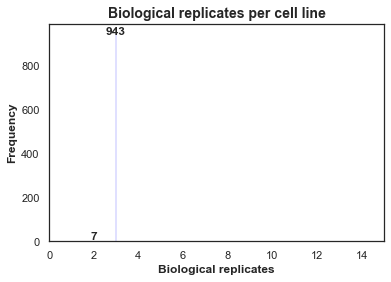

,Rep
Cell_line,
A431,2
BICR22,2
CHSA8926,2
ES6,2
MOLM-13,2
NCI-H1650,2
TMK-1,2


In [60]:
df_rep_bio = df_sample_map[lambda x: (x.Daisy_chain == 'No') & (~x.Cell_line.str.contains('Control_HEK293T'))][['Cell_line','Replicate']].groupby(['Cell_line','Replicate']).size().to_frame('Rep')
df_rep_bio = df_rep_bio.reset_index().groupby('Cell_line').size().to_frame('Rep')
plot = sns.distplot(df_rep_bio['Rep'], kde=False, color='blue')
plot.set_xlim(0,15)
plot.set_xlabel('Biological replicates', weight='bold')
plot.set_ylabel('Frequency', weight='bold')
plot.set_title('Biological replicates per cell line', weight='bold', fontsize=14)
counts = df_rep_bio.groupby('Rep').size().to_frame('Count')
for p in counts.index.tolist():
    plot.text(p, counts.loc[p,'Count'], counts.loc[p,'Count'], ha='center', weight='bold')
plt.show()
df_rep_bio.to_csv('Generate_sample_mapping/E0022_biological_replicates_per_cell_line.txt', sep='\t')
df_rep_bio[lambda x: x.Rep != 3]

These samples each had a dodgy cell pellet that we have decided not to re-source. Analysis will be completed with only 2 biological replicates. 

##### Technical replicates

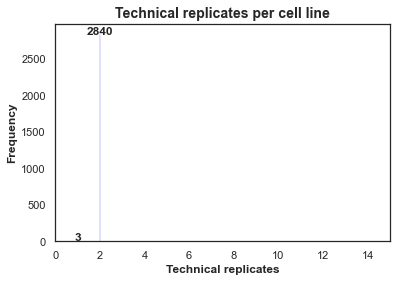

,,Rep
Cell_line,Replicate,
J82,3,1
NCI-H1341,3,1
NCI-H2818,3,1


In [61]:
df_rep_tech = df_sample_map[lambda x: (x.Daisy_chain == 'No') & (~x.Cell_line.str.contains('Control_HEK293T'))][['Cell_line','Replicate']].groupby(['Cell_line','Replicate']).size().to_frame('Rep')
plot = sns.distplot(df_rep_tech['Rep'], kde=False, color='blue')
plot.set_xlim(0,15)
plot.set_xlabel('Technical replicates', weight='bold')
plot.set_ylabel('Frequency', weight='bold')
plot.set_title('Technical replicates per cell line', weight='bold', fontsize=14)
counts = df_rep_tech.groupby('Rep').size().to_frame('Count')
for p in counts.index.tolist():
    plot.text(p, counts.loc[p,'Count'], counts.loc[p,'Count'], ha='center', weight='bold')
plt.show()
df_rep_tech.to_csv('Generate_sample_mapping/E0022_technical_replicates_per_cell_line.txt', sep='\t')
df_rep_tech[lambda x: x.Rep != 2]

Despite getting one good MS run from a cell pellet of each of these samples, we couldn't get a second good one. We have decided not to re-source.

### Finalise dataset according to SWON

In [62]:
empty_files = [ 
    '190714_8730_005re_00ewg_m04_s_1',
    '190715_5650_00840_00exs_m03_s_1',
    '190730_8916_00ejc_00feh_m03_s_1',
    '191030_b4-t1-16_00jr1_00l2t_m05_s_1',
    '191123_b24-t1-16_00jzx_00mt7_m06_s_1'
] # Confirmed by Michael Hecker on 080721 as empty or very small
df_sample_map = df_sample_map[lambda x: ~x.index.isin(empty_files)]

In [63]:
files_with_spaces_that_caused_problems = [
'180914_e0022_p02_ hek_h002 _s_m06_1',
'180914_e0022_p02_ hek_h002 _s_m06_2',
'180914_e0022_p02_ hek_h002 _s_m06_3']
for file in files_with_spaces_that_caused_problems:
    df_sample_map.index = df_sample_map.index.str.replace(file,file.replace(' ',''))

In [64]:
df_sample_map.to_csv('Generate_sample_mapping/E0022_P06_sample_map.txt', sep='\t')

### Sample mapping stats

In [65]:
print('Number of non-HEK cell lines analysed:',len([x for x in df_sample_map['Cell_line'].unique().tolist() if 'Control_HEK293T' not in x]))

Number of non-HEK cell lines analysed: 950


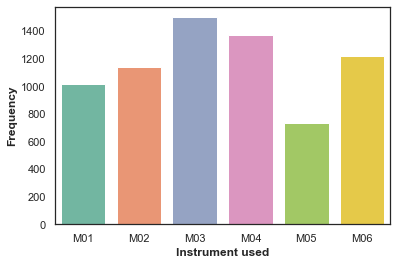

In [66]:
plot = sns.barplot(x='Instrument', y='Count', data=df_sample_map.groupby('Instrument').size().to_frame('Count').reset_index(), hue='Instrument', palette=instrument_colours, dodge=False)
plot.legend_.remove()
plot.set_xlabel('Instrument used', weight='bold')
plot.set_ylabel('Frequency', weight='bold')
plt.show()

In [67]:
df_sample_map = pd.read_csv('Generate_sample_mapping/E0022_P06_sample_map.txt', sep='\t').set_index('Automatic_MS_filename')

In [68]:
df_sample_map['Date'] = df_sample_map['Date'].apply(pd.to_datetime)

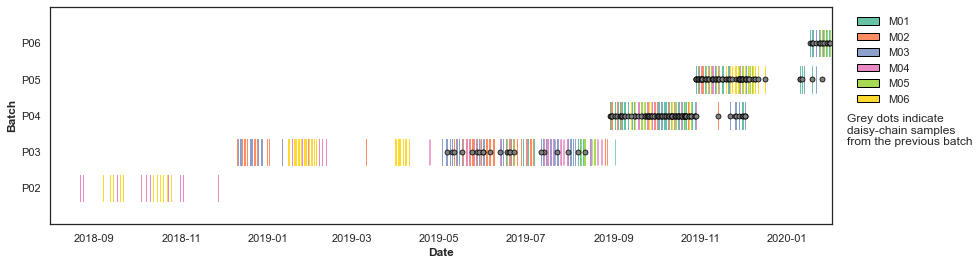

In [69]:
curr_df = df_sample_map.copy()
curr_df['Batch'] = curr_df['Batch'].str.replace('P0','')
curr_df['Batch'] = curr_df['Batch'].astype(float)
fig = plt.figure(figsize=[14,4])
for batch in df_sample_map['Batch'].unique().tolist():
    plot = sns.scatterplot(x='Date', y='Batch', data=curr_df[lambda x: x.Batch == int(batch.replace('P0',''))][lambda x: x.Daisy_chain == 'No'], palette=instrument_colours, hue='Instrument', marker='|', s=700)
    plot = sns.scatterplot(x='Date', y='Batch', data=curr_df[lambda x: x.Batch == int(batch.replace('P0',''))][lambda x: x.Daisy_chain == 'Yes'], color='grey', edgecolor='black', marker='.', s=100)
plot.set_xlim(pd.Timestamp('2018-08-01'),pd.Timestamp('2020-02-01'))
plot.set_xlabel('Date', weight='bold')
plot.set_ylabel('Batch', weight='bold')
plot.set_yticklabels(['','P02','P03','P04','P05','P06'])
plot.set_ylim(1,7)
plot.legend_.remove()
plot.text(0.915,0.4, 'Grey dots indicate\ndaisy-chain samples\nfrom the previous batch', transform=plt.gcf().transFigure)
plt.legend(instrument_patch, list(instrument_colours.keys()), frameon=False, bbox_to_anchor=[1.02,1])
plt.show()

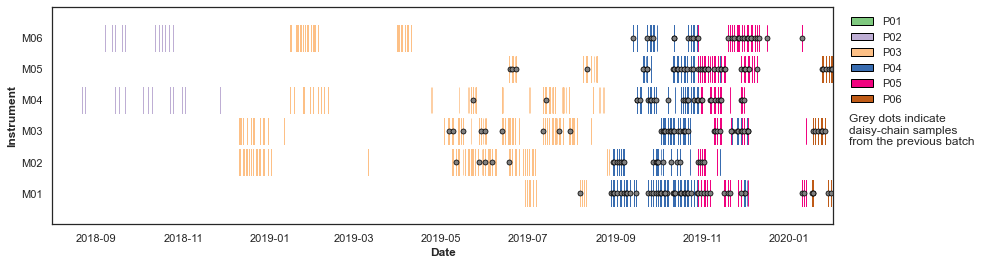

In [70]:
curr_df = df_sample_map.copy()
curr_df['Instrument'] = curr_df['Instrument'].str.replace('M0','')
curr_df['Instrument'] = curr_df['Instrument'].astype(float)
fig = plt.figure(figsize=[14,4])
for instrument in df_sample_map['Instrument'].unique().tolist():
    plot = sns.scatterplot(x='Date', y='Instrument', data=curr_df[lambda x: x.Instrument == int(instrument.replace('M0',''))][lambda x: x.Daisy_chain == 'No'], palette=batch_colours, hue='Batch', marker='|', s=700)
    plot = sns.scatterplot(x='Date', y='Instrument', data=curr_df[lambda x: x.Instrument == int(instrument.replace('M0',''))][lambda x: x.Daisy_chain == 'Yes'], color='grey', edgecolor='black', marker='.', s=100)
plot.set_xlim(pd.Timestamp('2018-08-01'),pd.Timestamp('2020-02-01'))
plot.set_xlabel('Date', weight='bold')
plot.set_ylabel('Instrument', weight='bold')
plot.set_yticklabels(['','M01','M02','M03','M04','M05','M06'])
plot.set_ylim(0,7)
plot.legend_.remove()
plot.text(0.915,0.4, 'Grey dots indicate\ndaisy-chain samples\nfrom the previous batch', transform=plt.gcf().transFigure)
plt.legend(batch_patch, list(batch_colours.keys()), frameon=False, bbox_to_anchor=[1.1,1])
plt.show()

##### Compare with OSW mapping

In [71]:
df_sample_map = pd.read_csv('Generate_sample_mapping/E0022_P06_sample_map.txt', sep='\t').set_index('Automatic_MS_filename')
curr = pd.read_csv('Generate_sample_mapping/OSW-version_E0022_P06_sample_map.txt', sep='\t').set_index('Automatic_MS_filename')

In [72]:
old_run_files_now_excluded = []
for x in curr.index.tolist():
    if x not in df_sample_map.index.tolist():
        old_run_files_now_excluded.append(x)
        
new_files_not_run_before = []
for x in df_sample_map.index.tolist():
    if x not in curr.index.tolist():
        new_files_not_run_before.append(x)

In [73]:
excluded_cell_lines = curr.loc[old_run_files_now_excluded]['Cell_line'].unique().tolist()
for x in excluded_cell_lines:
    if x not in str_discard:
        print(x)

In [74]:
df_sample_map.loc[new_files_not_run_before] # These files failed TOFFEE conversion but look okay for DIANN so are now in the dataset
# Checked with MH on 090721

,Batch,Code,Daisy_chain,Date,Instrument,Replicate,Cell_line,SIDM
Automatic_MS_filename,,,,,,,,
191012_b44-t1-4_00dlm_00jhh_m03_s_1,P04,7089,No,2019-10-12,M03,1.0,NCI-H1755,SIDM00738
191012_b44-t1-5_00dln_00jhi_m03_s_1,P04,2415,No,2019-10-12,M03,1.0,K5,SIDM00056


In [75]:
common_files = [x for x in df_sample_map.index.tolist() if x in curr.index.tolist()]
df_1 = df_sample_map.loc[common_files]
df_2 = curr.loc[common_files][['Batch','Code','Daisy_chain','Date','Instrument','Replicate','Cell_line','SIDM']]
for x in df_1.index.tolist():
    for y in df_1.columns.tolist():
        if df_1.loc[x,y] != df_2.loc[x,y]:
            print(x,y,df_1.loc[x,y], df_2.loc[x,y])
# Known differences due to labelling mixup that is corrected above

190618_hek-qcs_008sv_00c68_m02_s_1 Code HEK 3383
190618_hek-qcs_008sv_00c68_m02_s_1 Daisy_chain No Yes
190618_hek-qcs_008sv_00c68_m02_s_1 Cell_line Control_HEK293T_std_H002 NCI-H526
190618_hek-qcs_008sv_00c68_m02_s_1 SIDM Control_HEK293T SIDM01128


In [76]:
df_sample_map.shape

(6981, 8)